In [32]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.filters import threshold_local
from PIL import Image
from __future__ import print_function
import argparse

In [33]:
#define resize function
def opencv_resize(image, ratio):
    width = int(image.shape[1] * ratio)
    height = int(image.shape[0] * ratio)
    dim = (width, height)
    return cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

#define plot gray image with the size 16x10 function
def plot_gray(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(image, cmap='Greys_r')

#define plot color image with the size 16x10 function
def plot_rgb(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

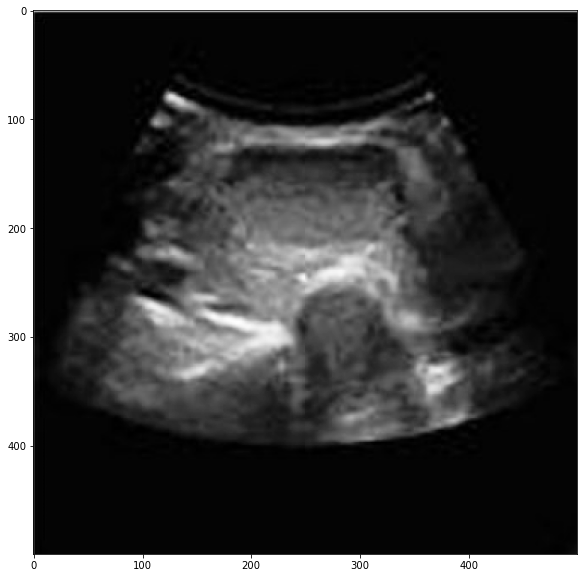

In [12]:
#get the image
file_name = 'C:/Users/Laptop88/Desktop/Thyroid Cancer untrasound images/The-single-layer-of-thyroid-ultrasound-image-after-cutting_Q320.jpg'
image = cv2.imread(file_name)
#downscale image to more efficient to find contour
resize_ratio = 500 / image.shape[0]
original=image.copy()
image = opencv_resize(image, resize_ratio)
#convert image to gray scale to easy utilise
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plot_gray(gray_image)

In [34]:
#noise reduction
blur = cv2.GaussianBlur(gray_image,(5,5),0)

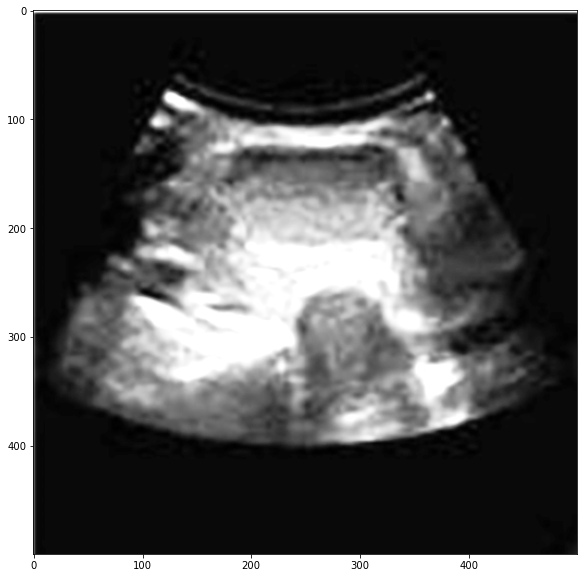

In [35]:
ret,thresh1 = cv2.threshold(blur,127,255,cv2.THRESH_TRUNC)
plot_gray(thresh1)

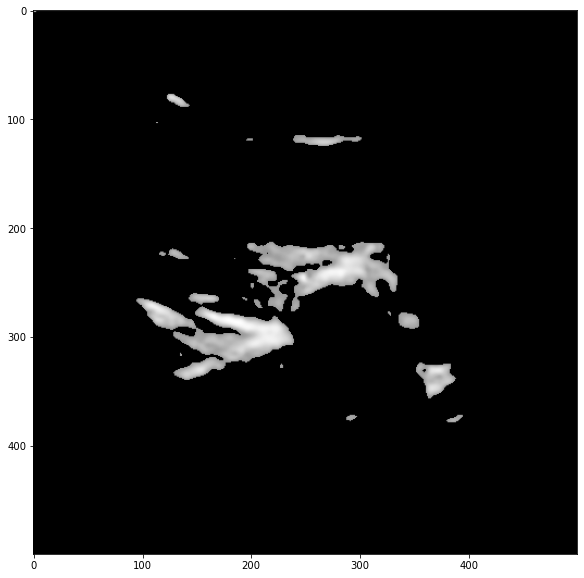

In [36]:
ret,thresh2 = cv2.threshold(blur,127,255,cv2.THRESH_TOZERO)
plot_gray(thresh2)

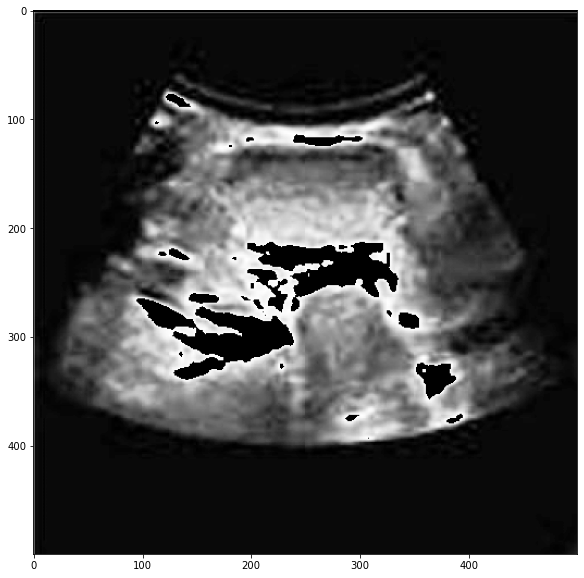

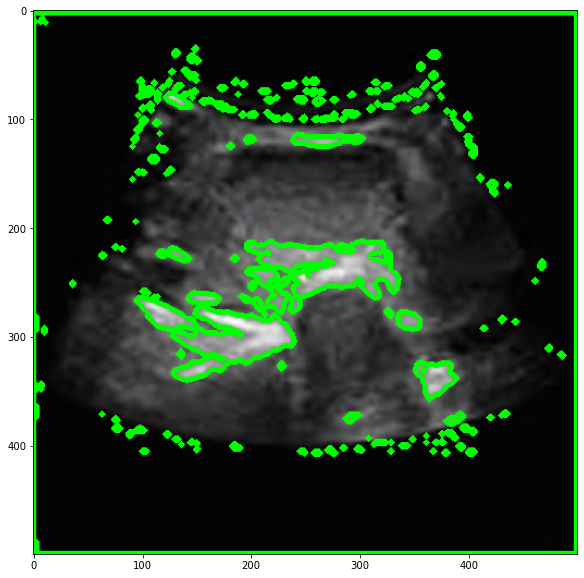

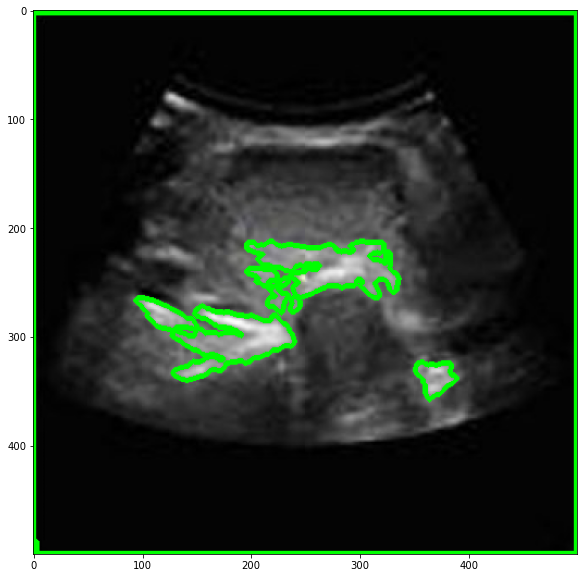

In [42]:
ret,thresh3 = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO_INV)
plot_gray(thresh3)
#highlight contour 
contours, hierarchy = cv2.findContours(thresh3, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image_with_contours = cv2.drawContours(image.copy(), contours, -1, (0,255,0), 3)
plot_rgb(image_with_contours)
#get largest contour
largest_contours = sorted(contours, key = cv2.contourArea, reverse = True)[:5]
image_with_largest_contours = cv2.drawContours(image.copy(), largest_contours, -1, (0,255,0), 3)
plot_rgb(image_with_largest_contours)

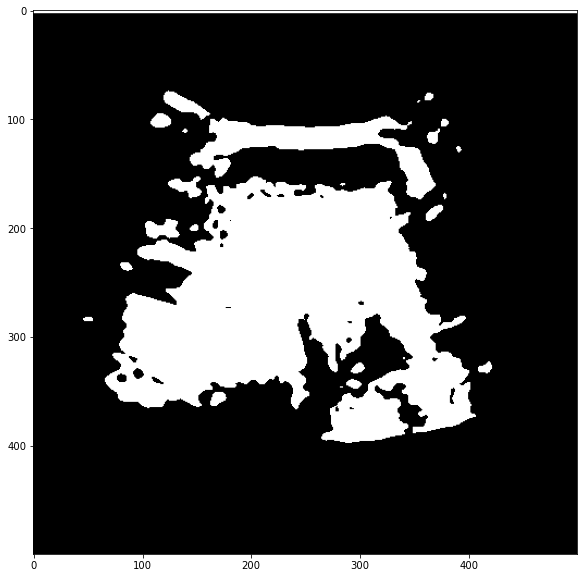

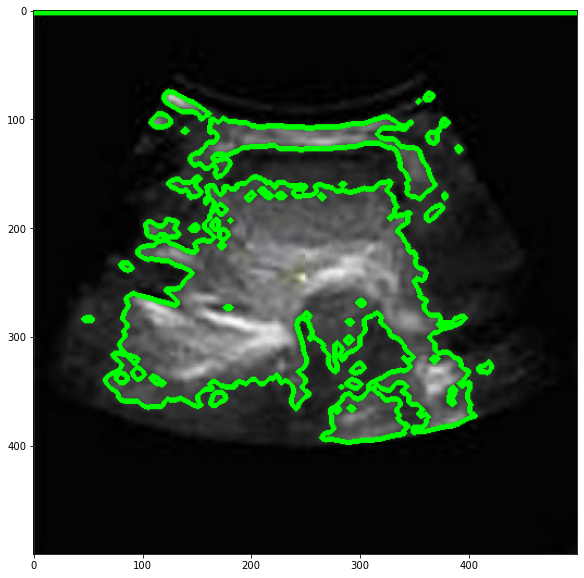

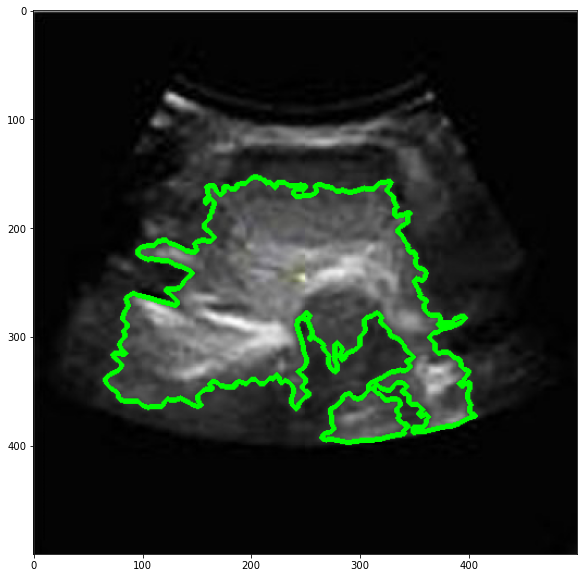

In [41]:
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
img = th3
plot_gray(img)
#highlight contour 
contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image_with_contours = cv2.drawContours(image.copy(), contours, -1, (0,255,0), 3)
plot_rgb(image_with_contours)
#get largest contour
largest_contours = sorted(contours, key = cv2.contourArea, reverse = True)[:1]
image_with_largest_contours = cv2.drawContours(image.copy(), largest_contours, -1, (0,255,0), 3)
plot_rgb(image_with_largest_contours)